# 1. Text preprocessing
- 불필요한 기호, 특수문자 제거
- 형태소 분석을 통한 단어 분리

In [3]:
!pip install konlpy
!apt-get install -y default-jdk


!pip install soynlp

import re
from konlpy.tag import Okt
from soynlp.word import WordExtractor

zsh:1: command not found: apt-get


In [5]:
pip install soynlp==0.0.493

Note: you may need to restart the kernel to use updated packages.


In [6]:
# 검색 키워드 = 더샵퍼스트월드 청약

In [11]:
train_text = """서울 지하철 7호선 라인을 인근에서 진행한 청약이 양호한 성적을 거둔 것으로 조사됐다. 핵심 업무 지구 가운데 하나인 강남을 연결하는 노선인데다 역주변을 따라 지역을 대표하는 단지들의 대규모 개발이 이어져서다.
11일 부동산 분석업체 부동산인포에 따르면 작년 1월부터 올해 2월까지 지하철 7호선 인근에선 13개 단지가 분양에 나서 4165가구에 31만6579명이 몰렸다. 1순위 평균 경쟁률은 76대 1이다. 같은 기간 수도권 1순위 평균 18.8대 1을 4배가량 웃도는 수준이다.
지하철 7호선은 서쪽에서는 인천과 부천, 북쪽에서는 중랑, 노원, 의정부 일대에서 강남을 가기 위한 핵심 노선이다. 서울시에 따르면 2023년 기준으로 7호선 일 평균 수송인원은 84만5000여명이다. 2호선, 5호선에 이어 3위다. 7호선 양 끝으로 노선 연장도 진행중이다. 인천쪽은 석남역~청라국제도시역, 경기 북부에서는 도봉산~옥정 구간 연장 공사가 한창이라 수도권 내 교통·부동산 시장에 큰 변화를 가져올 것으로 보인다.
7호선 라인에는 대규모 정비사업이 속속 진행돼 청약 경쟁률을 이끌었다. △서초구 '래미안 원펜타스(527.3대 1)', '메이플자이(442.3대 1)', '래미안 원페를라(151.6대)', '디에이치 방배(90.2대 1)'가, △강남구 '청담 르엘(667.2대 1)'이 분양했다. 지난해 하반기 청약 시장의 관심을 끈 노원구 '서울원 아이파크(14.9대 1)', 중랑구 '더샵 퍼스트월드 서울(9.3대 1)'도 선보였다.
경기도에서는 광명뉴타운에서 대규모 공급이 이어졌고 '광명자이힐스테이트SK뷰(3.8대 1)', '광명 롯데캐슬 시그니처(3.4대 1)'가 100% 계약을 마쳤다.
한 부동산 시장 전문가는 "7호선은 강남과 가산디지털단지 등 핵심 업무지구를 관통하고, 특히 인천과 경기도에서는 서울을 한번에 갈 수 있는 편의를 갖춰 수요자들의 선호도가 매우 높은 노선"이라며 "현재 착공에 들어간 곳 외에도 추가적으로 노선 연장이 진행중이라 교통의 핵심 축 위상을 더욱 강화할 것"이라고 말했다."""

## 1)
- 수업 때 배운대로 정규화하고, Soynlp로 아파트이름들 고유명사화 하고, Okt로 명사추출해서 뽑음
- 위 기사는 '7호선'이 꼭 나와야하는 단어라고 생각했는데
    - 이 방법으로는 '7'이랑 '호선'이 분리되거나 '호선'만 나와서 숫자+한글 결합이 필요했음 

In [13]:
# 1. 불필요한 특수문자 제거
train_text_clean = re.sub(r'[^가-힣0-9\s]', '', train_text)  # 그 외 특수문자는 제거

# 2. SoyNLP를 이용한 고유명사 병합
extractor = WordExtractor()
extractor.train(train_text)  # 텍스트 학습
word_score_table = extractor.extract()

# 3. 형태소 분석을 통한 단어 분리 (명사만 추출)
okt = Okt()
tokens = okt.nouns(train_text_clean)

# 4. 불용어 제거
tokens_clean = [token for token in tokens if token not in stopwords]

# 5. SoyNLP로 고유명사 병합
merged_tokens = []
for token in tokens_clean:
    if token in word_score_table:
        merged_tokens.append(word_score_table[token].best_score)
    else:
        merged_tokens.append(token)

print(merged_tokens)

training was done. used memory 0.030 Gb
all cohesion probabilities was computed. # words = 0
all branching entropies was computed # words = 0
all accessor variety was computed # words = 0
['서울', '지하철', '호선', '라인', '인근', '진행', '청약', '양호', '성적', '조사', '핵심', '업무', '지구', '가운데', '하나', '강남', '노선', '역', '주변', '지역', '대표', '단지', '대규모', '개발', '부동산', '분석', '업체', '부동산', '인포', '작년', '올해', '지하철', '호선', '인근', '개', '단지', '분양', '가구', '순위', '평균', '경쟁률', '기간', '수도권', '순위', '평균', '배', '가량', '수준', '지하철', '호선', '서쪽', '인천', '부천', '북쪽', '중랑', '노원', '의정부', '일대', '강남', '가기', '위', '핵심', '노선', '서울시', '기준', '호선', '일', '평균', '송인', '여명', '호선', '호선', '위', '호선', '양', '끝', '노선', '연장', '진행중', '인천', '쪽', '석남', '역', '청라국제도시역', '경기', '북부', '도봉산', '옥정', '구간', '연장', '공사', '한창', '수도권', '내', '교통', '부동산', '시장', '변화', '호선', '라인', '대규모', '정비', '사업', '진행', '청약', '경쟁률', '서초구', '래미안', '펜', '스', '메이플', '래미안', '원페를', '디', '에이치', '방배', '강남구', '청담', '르', '분양', '지난해', '하반기', '청약', '시장', '관심', '끈', '노원구', '서울', '아이파크', '중랑구', '더', '퍼스트', 

## 2.
- 후처리를 통해 숫자+명사 결합하고 이 과정들을 함수로 만듦
- 뭔가 깔끔하게 뽑히진 않았지만 그럭저럭 있어야 할 단어는 있는 느낌,,
- 말고도 '7호선'으로 뽑는 방법은 Bigram을 사용해 '7_호선' 처럼 추출하는 방법이 있는 듯 하지만 시도해보진 않음

In [21]:
# 불용어 리스트 - 이건 그냥 뽑힌 토큰들 보고 하나씩 임의로 추가함
stopwords = ['곳', '외', '것', '도', '이', '명', '이다']

# SoyNLP로 고유명사 추출
def extract_proper_nouns(text):
    extractor = WordExtractor()
    extractor.train([text])
    word_scores = extractor.extract()
    return [word for word, score in word_scores.items() if score.cohesion_forward > 0.3]

# Okt + 후처리

okt = Okt()

def preprocess_korean(train_text):
    # 1단계: 기본 전처리
    text_clean2 = re.sub(r'[^가-힣0-9\s]', '', train_text) 
    
    # 2단계: SoyNLP 고유명사 추출 - 잘 사용하지 않는 아파트 이름
    proper_nouns = extract_proper_nouns(text_clean2)
    
    # 3단계: 숫자+한글 결합 단어 추출 (예: 84㎡, 7호선)
    num_hangul = re.findall(r'\d+[가-힣㎡]+', text_clean2)
    
    # 4단계: Okt 명사 추출 (고유명사 반영)
    okt_nouns = okt.nouns(text_clean2)
    
    # 5단계: 통합 및 필터링
    combined = list(set(proper_nouns + num_hangul + okt_nouns))
    return [word for word in combined if word not in stopwords and len(word) > 1]

result = preprocess_korean(train_text)
print(result)

training was done. used memory 0.045 Gb0.045 Gb
all cohesion probabilities was computed. # words = 9
all branching entropies was computed # words = 53
all accessor variety was computed # words = 53
['작년', '1이다', '2호선', '기준', '퍼스트', '편의', '공사', '사업', '13개', '인포', '디지털', '1순위', '에이치', '위상', '하나', '기간', '계약', '지하철', '6672대', '7호', '수준', '강남', '1월부터', '7호선은', '한창', '공급', '청담', '93대', '서쪽', '뉴타운', '조사', '1가', '84만', '업체', '여명', '가기', '변화', '서초구', '가량', '4165가구에', '902대', '북쪽', '송인', '76대', '일대', '월드', '관통', '롯데', '1516대', '중랑구', '분양', '캐슬', '더욱', '인천', '노선', '착공', '한번', '분석', '7호선', '단지', '올해', '도봉산', '경기', '진행', '부천', '1도', '대규모', '지난해', '2월까지', '1이', '양호', '가운데', '노원', '정비', '경기도', '현재', '광명', '추가', '서울시', '원페를', '의정부', '청약', '지구', '노원구', '34대', '아이파크', '업무', '4423대', '경쟁률', '시장', '래미안', '힐스테이트', '석남', '순위', '5273대', '관심', '188대', '대표', '구간', '호선', '주변', '호도', '지역', '1을', '개발', '메이플', '라인', '방배', '중랑', '북부', '11일', '31만', '부동산', '옥정', '가산', '핵심', '3위다', '성적', '연장', '하반기', '전문가', '수도권', '강

# 2. Vectorization
- 단어 토큰들 벡터화
- TF-IDF :빈도수 높은 단어를 키워드로 추출 (위에 1번 방법으로 토큰화 한 결과를 사용함)

## !!! 확인
- TF-IDF는 2개 이상의 문서 집합을 대상으로 사용해야 하는데 아래는 기사 1개만 가지고 TF-IDF를 뽑아낸것이라 '호선', '노선' 말고는 tf-idf값이 동일하게 나오는 것들이 있어 약간 부정확한 것을 알 수 있음,,,
- 아파트 청약 기사 TF-IDF 추출할때 : 기사를 한덩어리로 합치지 말고 각 기사를 corpus를 생성해 묶어야 할 듯
    - 교재 2.Text Vectorization 참고!

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 병합된 텍스트를 다시 하나의 문자열로 변환
merged_text = ' '.join(merged_tokens)

# TF-IDF 벡터화 진행
vectorizer = TfidfVectorizer(stop_words=stopwords) 
X = vectorizer.fit_transform([merged_text])

# 단어 목록 출력
print("단어 목록:")
print(vectorizer.get_feature_names_out())

# TF-IDF 값 출력
print("\nTF-IDF 값:")
print(X.toarray())

import numpy as np

# 단어 목록 (vocabulary)와 TF-IDF 값
vocabs = vectorizer.get_feature_names_out()
tfidf_values = X.toarray().flatten()

# TF-IDF 값이 높은 상위 10개의 단어를 선택
top_n = 10
indices = np.argsort(tfidf_values)[-top_n:]  # TF-IDF 값이 높은 상위 10개 인덱스
top_words = [vocabs[i] for i in indices]
top_values = tfidf_values[indices]

단어 목록:
['가구' '가기' '가량' '가산' '가운데' '강남' '강남구' '개발' '경기' '경기도' '경쟁률' '계약' '공급' '공사'
 '관심' '관통' '광명' '교통' '구간' '기간' '기준' '노선' '노원' '노원구' '뉴타운' '단지' '대규모' '대표'
 '더욱' '도봉산' '디지털' '라며' '라인' '래미안' '롯데' '매우' '메이플' '방배' '변화' '부동산' '부천'
 '북부' '북쪽' '분석' '분양' '사업' '서울' '서울시' '서쪽' '서초구' '석남' '성적' '송인' '수도권' '수준'
 '순위' '시장' '아이파크' '양호' '업무' '업체' '에이치' '여명' '연장' '옥정' '올해' '원페를' '월드' '위상'
 '의정부' '인근' '인천' '인포' '일대' '작년' '전문가' '정비' '조사' '주변' '중랑' '중랑구' '지구' '지난해'
 '지역' '지하철' '진행' '진행중' '착공' '청담' '청라국제도시역' '청약' '추가' '캐슬' '퍼스트' '편의' '평균'
 '하나' '하반기' '한번' '한창' '핵심' '현재' '호도' '호선' '힐스테이트']

TF-IDF 값:
[[0.05177804 0.05177804 0.05177804 0.05177804 0.05177804 0.15533411
  0.05177804 0.05177804 0.05177804 0.10355607 0.10355607 0.05177804
  0.05177804 0.05177804 0.05177804 0.05177804 0.15533411 0.10355607
  0.05177804 0.05177804 0.05177804 0.25889019 0.05177804 0.05177804
  0.05177804 0.15533411 0.15533411 0.05177804 0.05177804 0.05177804
  0.05177804 0.05177804 0.10355607 0.10355607 0.05177804 0.05177804
  0.0

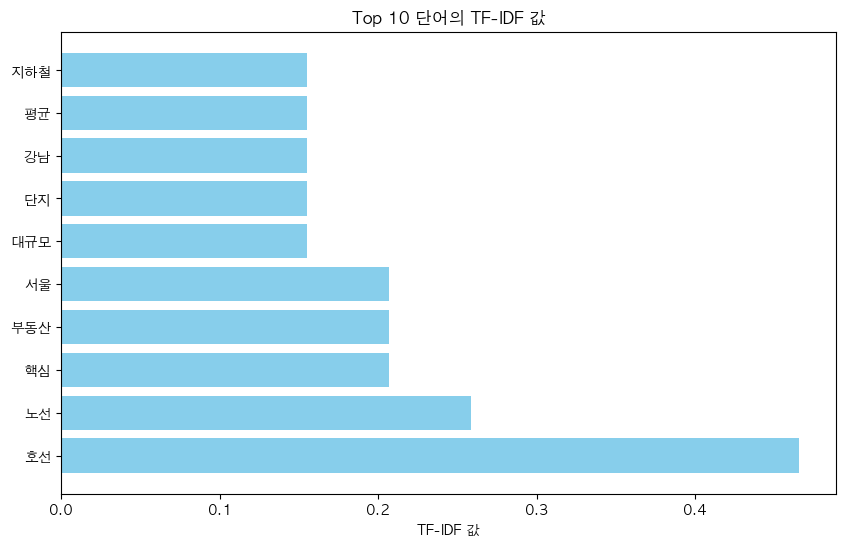

In [23]:
# 바 그래프 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_values, color='skyblue')
plt.xlabel('TF-IDF 값')
plt.title(f'Top {top_n} 단어의 TF-IDF 값')
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록
plt.show()